In [1]:
library(readr)
library(reshape2)
library(ggplot2)

data <- read_csv("nsw.csv", show_col_types = FALSE)

categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "CommuteTimeDiff", "WorkTimeDiff",
  "HouseworkTimeDiff", "FamilyTimeDiff", "Sociability",
  "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "ReducedPromotion", "SocialIsolation", "SleepTimeDiff",
  "ExtraCosts", "WorkCompatibility", "Motivation",
  "HomeEnvironment", "Wellbeing", "MentalHealth", "PhysicalActivity"
)

data[categorical_columns] <- lapply(data[categorical_columns], as.factor)
data[numeric_columns] <- lapply(data[numeric_columns], as.numeric)
data[numeric_columns] <- lapply(data[numeric_columns], scale)

cat("Dimension:", dim(data))

head(data)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


Dimension: 1420 25

Age,Gender,Experience,Industry,FamilyStatus,Location,ReducedPromotion,CommuteTimeDiff,WorkTimeDiff,HouseworkTimeDiff,⋯,Motivation,HomeEnvironment,Wellbeing,MentalHealth,PhysicalActivity,Sociability,ManagingRole,RemoteWorkExtent,RemoteWorkSupport,Productivity
"<dbl[,1]>",<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0.25489190,Male,0.9403261,Other Services,Couple with dependent children,Metro,-1.1175702,-0.61964823,1.3719844,-0.2207096,⋯,-0.166609,0.01176681,1.2139968,0.7521611,0.7859694,-0.5502987,No,0.004252265,1.0535760,1.0775389
0.67971175,Male,0.9403261,Construction,Couple with no dependent children,Metro,0.1261208,-0.26621209,1.3719844,1.5534631,⋯,-0.166609,0.01176681,-0.1433854,-0.7089452,-0.5255189,-0.5502987,No,-1.203391119,-0.5638055,1.0775389
0.08496397,Female,-2.0368490,Financial and Insurance,Single person,Metro,-1.1175702,-0.61964823,-0.2026512,0.6663767,⋯,1.258600,1.40417235,-0.1433854,0.7521611,-0.5255189,-1.9432116,No,1.211895650,1.0535760,-0.4822014
1.44438746,Female,-0.5482615,Health Care and Social Assistance,One parent family with dependent children,Regional,-1.1175702,0.79409634,-0.2026512,-1.9948822,⋯,-1.591818,-1.38063873,-1.5007676,0.7521611,0.7859694,0.8426142,Yes,0.004252265,-0.5638055,1.0775389
-0.50978381,Male,-0.5482615,Manufacturing,Couple with dependent children,Metro,0.1261208,0.08722406,-0.2026512,1.5534631,⋯,-0.166609,0.01176681,-0.1433854,-0.7089452,-0.5255189,-0.5502987,No,0.004252265,-0.5638055,-0.4822014
0.50978381,Male,0.9403261,Public Administration and Safety,Couple with dependent children,Metro,-1.1175702,0.08722406,-0.2026512,-0.2207096,⋯,1.258600,0.01176681,-0.1433854,0.7521611,0.7859694,0.8426142,Yes,1.211895650,-0.5638055,-0.4822014


                 Var1              Var2         value
1                 Age               Age  1.0000000000
2          Experience               Age  0.3406571016
3     CommuteTimeDiff               Age -0.0286042664
4        WorkTimeDiff               Age  0.1051347432
5   HouseworkTimeDiff               Age -0.0203112269
6      FamilyTimeDiff               Age -0.0055733135
7         Sociability               Age -0.0378644986
8    RemoteWorkExtent               Age  0.0654394558
9   RemoteWorkSupport               Age  0.0188842383
10       Productivity               Age -0.0243750316
11   ReducedPromotion               Age -0.1693383601
12    SocialIsolation               Age -0.1558963105
13      SleepTimeDiff               Age -0.0589045219
14         ExtraCosts               Age -0.1077754788
15  WorkCompatibility               Age -0.0973599913
16         Motivation               Age -0.0996721655
17    HomeEnvironment               Age -0.1564051211
18          Wellbeing       

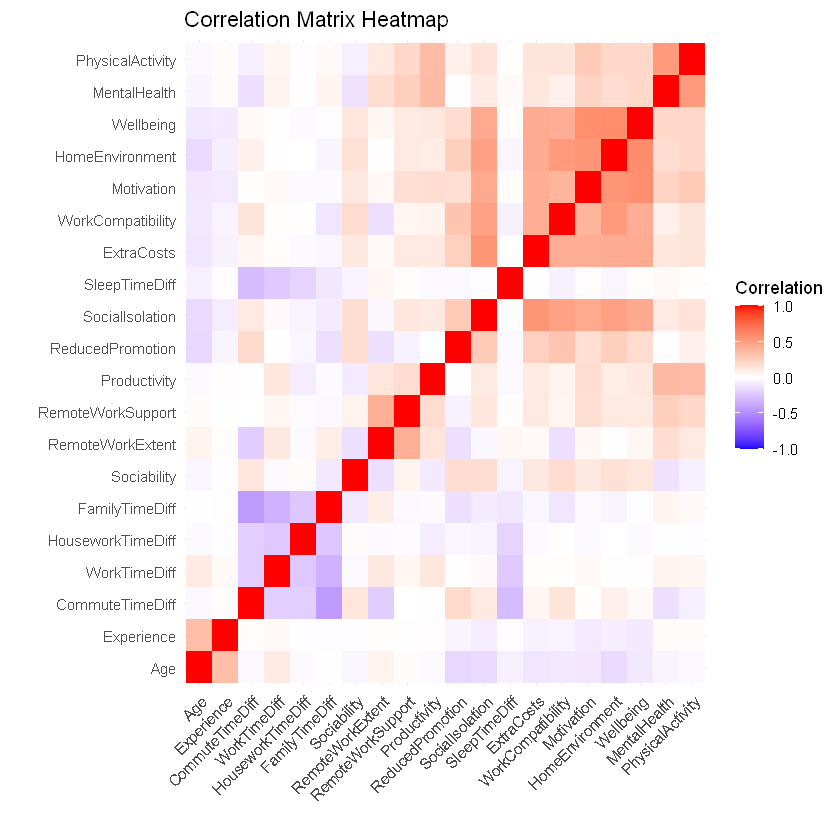

In [2]:
correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

correlation_melt <- melt(correlation_matrix)

heatmap_plot <- ggplot(
  correlation_melt,
  aes(x = Var1, y = Var2, fill = value)
) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0,
                       limits = c(-1, 1), name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Matrix Heatmap", x = "", y = "")

print(heatmap_plot)
print(correlation_melt)